In [136]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [30]:
df = pd.read_csv(r'C:\\Users\\as77475\\Coding\\vgsales.csv')
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
data = df.rename(columns={'Global_Sales': 'Total_Sales'})
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [33]:
data = data.dropna(subset=['Year'])
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [34]:
null_data = data.isnull().sum()
print(null_data)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64


In [35]:
data.dropna(inplace=True)
data_check = data.isnull().sum()
print(data_check)

Rank           0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64


In [36]:
data.groupby(['Name','Platform','Genre']).agg({'Total_Sales':'sum'}).sort_values(by='Total_Sales', ascending=False).head(5)

,,,Total_Sales
Name,Platform,Genre,
Wii Sports,Wii,Sports,82.74
Super Mario Bros.,NES,Platform,40.24
Mario Kart Wii,Wii,Racing,35.82
Wii Sports Resort,Wii,Sports,33.00
Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37


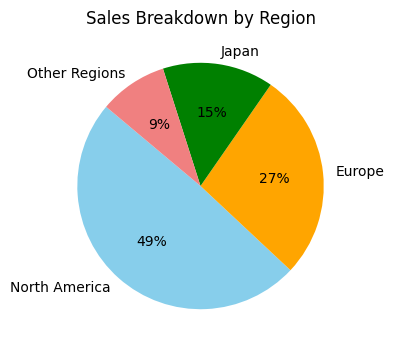

In [37]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = data[sales_columns].sum()
labels = ['North America', 'Europe', 'Japan', 'Other Regions']

sizes = sales_data.values


plt.figure(figsize=(4, 4))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.0f%%', 
    startangle=140, 
    colors=['skyblue', 'orange', 'green', 'lightcoral']
)
plt.title('Sales Breakdown by Region')
plt.show()

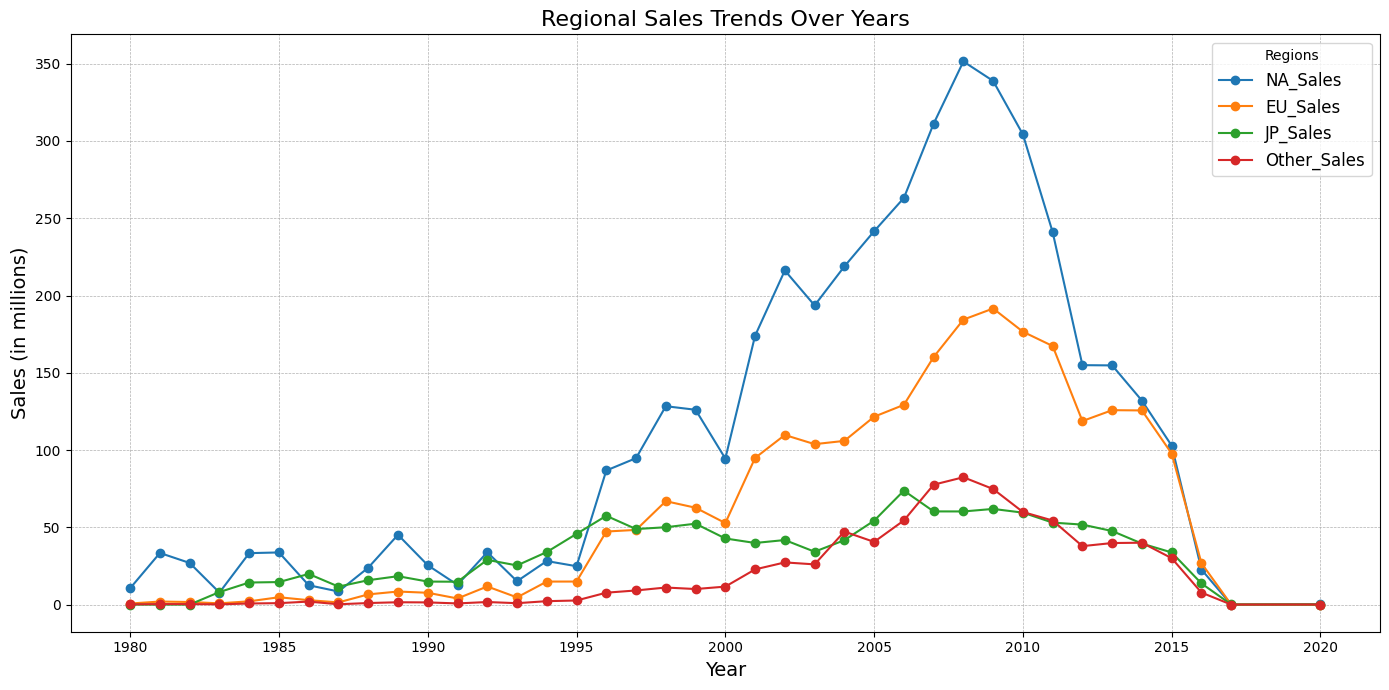

In [38]:
regional_sales = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot the trends for each region
plt.figure(figsize=(14, 7))
for region in regional_sales.columns:
    plt.plot(regional_sales.index, regional_sales[region], marker='o', linestyle='-', label=region)

# Adding plot details
plt.title('Regional Sales Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.legend(title="Regions", fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

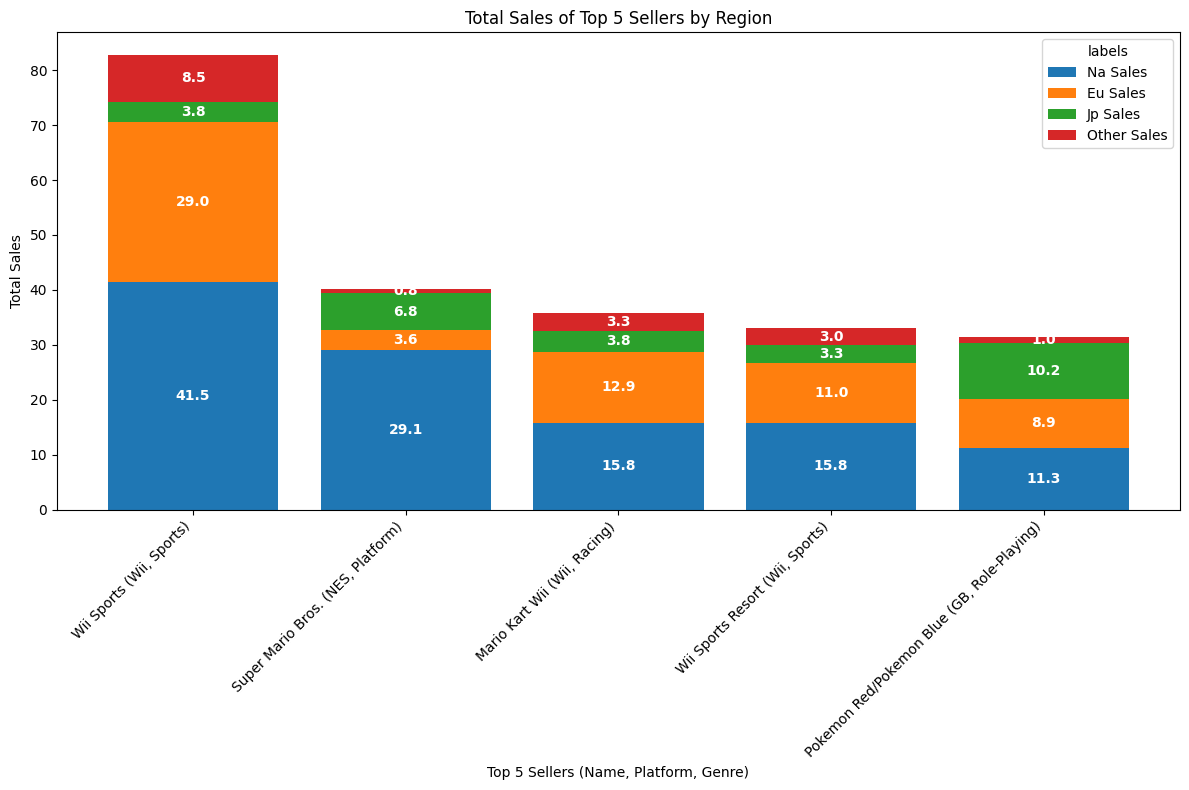

In [39]:

top_sellers = (
    data.groupby(['Name', 'Platform', 'Genre'])
    .agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Total_Sales': 'sum'})
    .sort_values(by='Total_Sales', ascending=False)
    .head(5)
)

# Reset index for easier access to 'Name' and sales columns
top_sellers = top_sellers.reset_index()

# Extract regional sales and seller names
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_data = top_sellers[regions]
seller_labels = top_sellers.apply(lambda row: f"{row['Name']} ({row['Platform']}, {row['Genre']})", axis=1)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))



# Create the bars for each region
bottoms = None
for idx, region in enumerate(regions):
    plt.bar(
        seller_labels,
        region_data[region],
        bottom=bottoms,
        label=region.replace('_', ' ').title(),
    )
    if bottoms is None:
        bottoms = region_data[region]
    else:
        bottoms += region_data[region]

    # Add region subtotals to each bar
    for i, total in enumerate(region_data[region]):
        y_position = bottoms[i] - total / 2  # Position in the middle of the segment
        plt.text(
            i,  # X position
            y_position,  # Y position
            f"{total:.1f}",  # Text value (1 decimal place)
            ha='center',  # Centered horizontally
            va='center',  # Centered vertically
            color='white',  # Text color
            fontsize=10,  # Text size
            fontweight='bold',  # Bold text
        )

# Add labels, legend, and title
plt.xlabel('Top 5 Sellers (Name, Platform, Genre)')
plt.ylabel('Total Sales')
plt.title('Total Sales of Top 5 Sellers by Region')
plt.legend(title='labels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
data.shape

(16291, 11)

In [77]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [32]:
#Decision tree model packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder


## Predicting video game sales by genre of game

In [72]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [120]:
#Define features and target
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Year','Global_Sales','Platform','Genre']]
target = df['Genre']

#Transforming Categorical data in the features to a string
label_encoders = {}
for col in ['Platform','Genre']:
    le = LabelEncoder()
    features.loc[:, col] = le.fit_transform(features[col].astype(str))
    label_encoders[col] = le

#target variable
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target.astype(str))

#Splitting the data for decision tree model
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Training the algorithm
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50, random_state=42)
dt_classifier.fit(X_train, y_train)

#Evaluatating the  the models
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
score = cross_val_score(clf, X,y, cv=5)
auc = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

print("Model Accuracy:", accuracy)
print("Mean of Cross-Validation Score:", score.mean().round(2))
print("ROC & AUC Score:", auc)

Model Accuracy: 0.9114457831325301
Mean of Cross-Validation Score: 0.97
ROC & AUC Score: 0.9952666666666666


In [121]:
# Accuracy on training data
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Accuracy on test data
print("Test Accuracy:", accuracy)

Training Accuracy: 0.9115830697394186
Test Accuracy: 0.9114457831325301


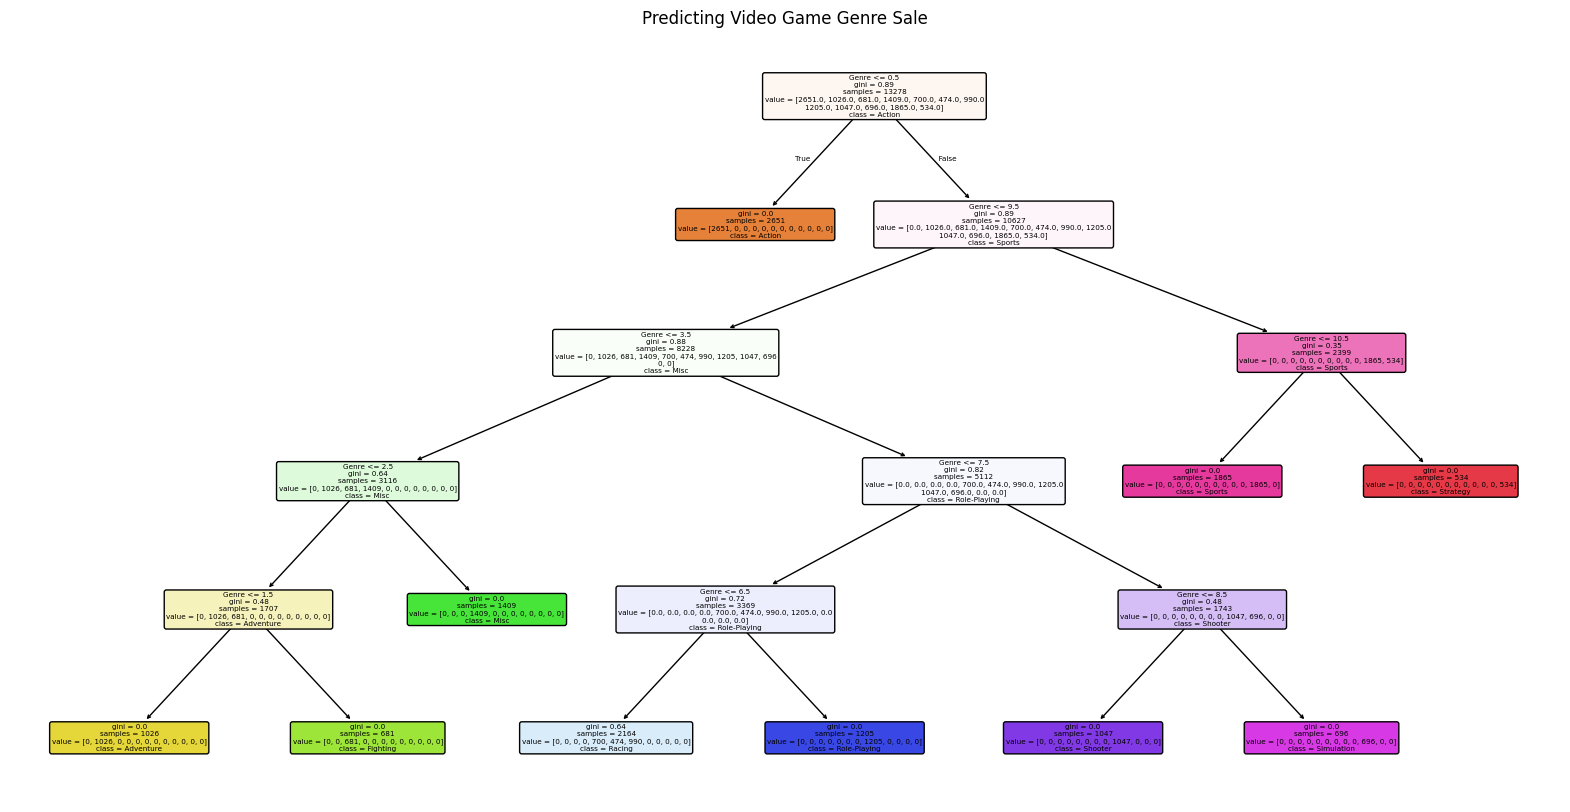

In [123]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris


#Decision Tree Graph
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=features.columns, 
          class_names=target_encoder.classes_, 
          filled=True,
         rounded=True,
         precision=2)
plt.title("Predicting Video Game Genre Sale")
plt.show()

In [131]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [133]:
rf_y_pred = clf.predict(X_test)
print("Random Forest Model's Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


Random Forest Model's Accuracy: 0.891867469879518
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       665
           1       0.99      0.84      0.91       260
           2       0.91      0.75      0.82       167
           3       0.83      0.98      0.90       330
           4       0.89      0.63      0.74       186
           5       0.70      0.66      0.68       108
           6       0.66      0.87      0.75       259
           7       0.74      0.82      0.78       283
           8       0.90      0.94      0.92       263
           9       0.97      0.67      0.79       171
          10       1.00      0.99      0.99       481
          11       1.00      0.97      0.99       147

    accuracy                           0.89      3320
   macro avg       0.88      0.84      0.86      3320
weighted avg       0.90      0.89      0.89      3320



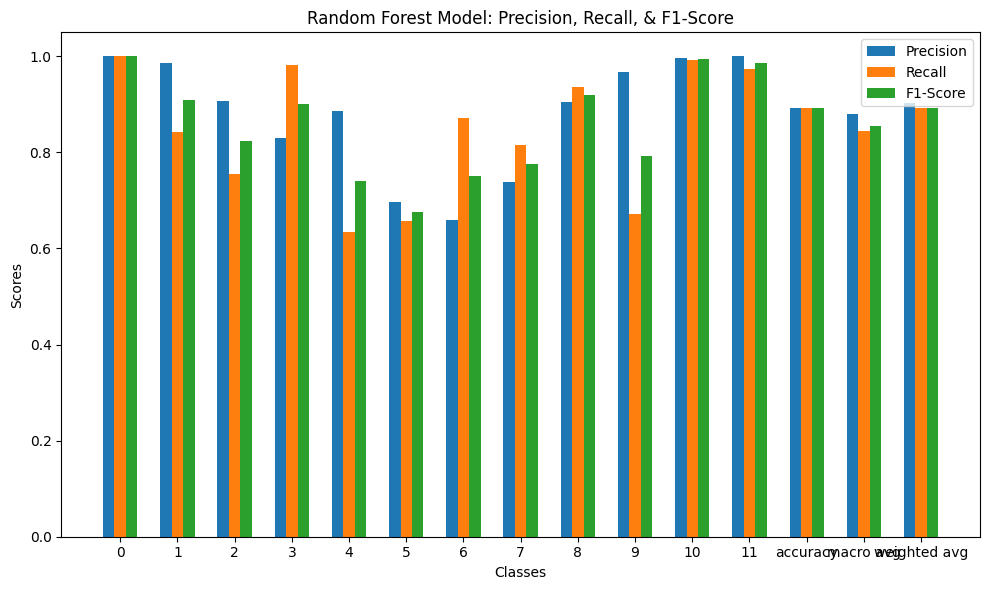

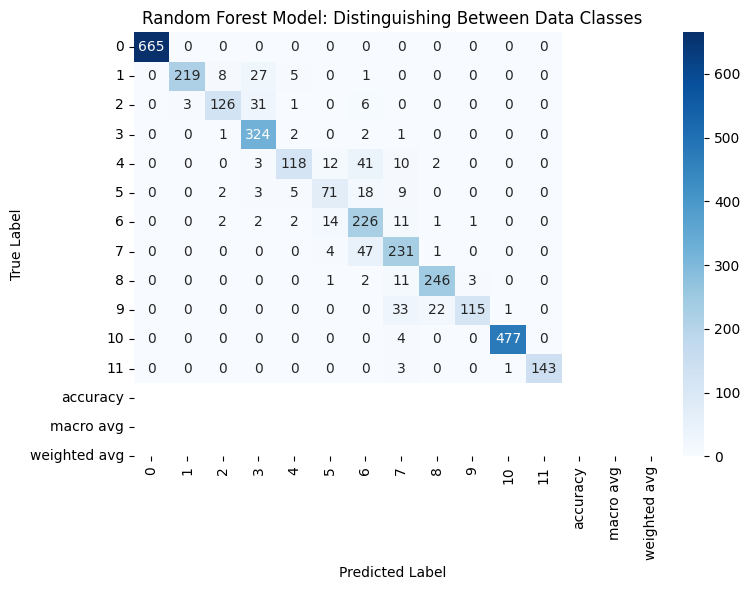

In [146]:

rf_graph = classification_report(y_test, rf_y_pred, output_dict=True)
rf_dataframe = pd.DataFrame(rf_graph).transpose()


# Create a bar chart for precision, recall, and f1-score
x = np.arange(len(rf_dataframe.index)) 
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax1 = ax.bar(x - width, rf_dataframe['precision'], width, label='Precision')
ax2 = ax.bar(x, rf_dataframe['recall'], width, label='Recall')
ax3 = ax.bar(x + width, rf_dataframe['f1-score'], width, label='F1-Score')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_xlabel('Classes')
ax.set_title('Random Forest Model: Precision, Recall, & F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(rf_dataframe.index)
ax.legend()
plt.tight_layout()
plt.show()

# Simulated confusion matrix based on the image
cm = confusion_matrix(y_test,rf_y_pred)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_dataframe.index, yticklabels=rf_dataframe.index)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Model: Distinguishing Between Data Classes')
plt.tight_layout()
plt.show()


